# **Exploratory Data Analysis**


* This notebook documents ......

## Objectives
- **Obj**: ....
 


## Inputs
* Processed Dataset: `02_PROCESSED_NEA-Seafloor-Litter.csv`. 

    This served as the initial data source.

## Outputs

* .....


## Additional Comments

* .....



11.1 Research and experiment with the application of data analytics tools, technologies, and methodologies:
Explain why you chose specific tools (e.g., comparing different Python libraries like Matplotlib vs. Plotly for visualisation). Detail in Jupyter any experiments with new tools or methodologies, showing code snippets and explaining their results. Include version control commits that show progressive experimentation and refinements of your work. Incorporate new tools/technologies you've researched (such as a new library). The project would show evidence of trial, adaptation, and application in a meaningful way. Focus on challenges encountered and solutions found, explaining how you adapted to using them in the project.


# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

---

# Section 1 : Descriptive Statistics

## In this section:
- Introduction to the key statistical concepts used throughout the analysis.
- #TODO
-




### 1.1 Introduction to Core Statistical Concepts

During data analysis, we want to be able to describe and interpret our dataset. We can do so by utilising statistical concepts that help us identify patterns and draw conclusions.

Summary statistics summarise the mean, median, mode, standard deviation and min/max values in one statistic.

---

1. `MEAN:` The mean is a statistical tool used to find the average of a set of given numbers. 

- To calculate it, sum all of the values in the dataset and divide that sum by the count. We can use np.mean() to do so.

    - Sum: Total amount of the addition of all datapoints in the given numerical column.
    - Count: Total number of all datapoints in the set.

This is an important foundational principle for data analysis because it provides a measure of central tendency which represents the typical value in a given data column. This allows us to compare averages across different datasets or subgroups within a given dataset. The mean can also be used to examine the change in mean over an extended period of time to view shifts and trends in the data.

Note: It is important to note, however, that the mean is sensitive to extreme outliers. In datasets that have highly skewed distribution, the mean may not accurately represent a typical datapoint. Hence, we must investigate the data in conjunctions with other statistical measures.

---

2. `MEDIAN:` The median is a statistical tool used to find the middle value of an ordered set of given numbers. 

- To calculate it, you first need to order the datapoints in ascending order.

    - If you have an odd number of values, the median is simply the middle number.
    - If you have an even number of values, the median is the averaege of the two middle numbers.

    We can use np.median() to do so.

This is an important foundational principle for data analysis because it helps to identify a typical value of the dataset - 50% of the data is above this point and 50% of the data is below this point.

Note: Unlike the mean, the median is not affected by extreme outliers, therefore it is a better measure of central tendency for a dataset with a skewed distribution. If the mean and median values are closely aligned, the data is likely symmetrical with a normal distribution, else, if they are not aligned, the data is likely skewed.

---

3. `MODE:` The mode is a statistical tool used to find the most frequent value in the given datapoints.

- To calculate it, simply count the number of times each value appears in the data.

We can use scipy.stats.mode() to do so on a numpy array.

This is an important foundational principle for data analysis because because it allows us to identify the most common / popular value in our data. It is especially helpful for analysing categorical types, such as types of litter.
    
---

4. `STANDARD DEVIATION:` Standard deviation is a statistical tool used to measure how spread out the numbers in a dataset are.

- To calculate it you can use: np.std(data)
- Since we are using DataFrames we can use df.std() from Pandas.

$$
\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}
$$

This is an important foundational principle for data analysis because it tells us how far out the data is from the mean value. 

- Small standard deviation: The datapoints are close to the average.
- Large standard deviation: The datappoints are far from the average.

---
5. `HYPOTHESIS TESTING:` Hypothesis testing is a statistical concept used to check if our guesses about the data are likely to be true.

- It involves setting up a "null hypothesis" (a statement we want to test) and then using statistical tests to see if the data provides enough evidence to reject it.

This is an important foundational principle for data analysis because it allows us to check if observerd patterns are either likely to be due to chance or if they are statistically significant.

---
6. `BASIC PROBABILITY:` Probability is a statistical concept used to understand how likely it is that something will happen.

- It's expressed as a number between 0 and 1 (or as a percentage). 0 means it's impossible, and 1 (or 100%) means it's certain.

This is an important foundational principle for data analysis because it helps us understand the changes of different outcomes. For example, if we want to know the probability of finding a certain type of litter in a specifc area, based on the historical information, we can use probability to understand how likely that is.


### 1.2 Statistical Summary for Numerical Values

This section provides a statistical overview of the numerical data, calculating and interpreting descriptive measures such as mean, median, and standard deviation.


In [4]:
# Import libraries
import numpy as np
import pandas as pd

In [5]:
# Load in the processed dataset
df = pd.read_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv')

In [6]:
# Display the first few rows of the full dataset
df.head()

,survey,cruise,area,station,Latitude,Longitude,date,bottle,sheet,bag,...,other.wood,clothing,shoes,other.misc,totallitter,distance,wingspread,year,month,day
0,IBTS,CIRO 9/92,Greater North Sea,1,51.738333,1.753333,1992-08-14,0,0,1,...,0,0,0,0,1,3794,0,1992,8,14
1,IBTS,CIRO 9/92,Greater North Sea,2,51.601667,2.796667,1992-08-15,0,0,1,...,0,0,0,0,2,3918,0,1992,8,15
2,IBTS,CIRO 9/92,Greater North Sea,3,51.823333,3.643333,1992-08-15,0,0,0,...,0,0,0,0,1,3624,0,1992,8,15
3,IBTS,CIRO 9/92,Greater North Sea,4,52.823333,2.760000,1992-08-16,0,0,1,...,0,0,0,0,1,3642,0,1992,8,16
4,IBTS,CIRO 9/92,Greater North Sea,5,52.685000,3.411667,1992-08-16,1,0,1,...,0,0,0,0,2,3791,0,1992,8,16


In [29]:
# Load in the category counts datasets
df_alltime = pd.read_csv("data/03_ALL_TIME_litter_totals.csv")

In [28]:
# Print the all-time dataset
df_alltime

,category,count
0,Plastic,7988
1,Metal,502
2,Rubber,563
3,Glass,99
4,Plant-Based Materials,710
5,Clothing & Fabrics,457
6,Miscellaneous,239


The purpose of this code is to provide a thorough, non-graphical analysis of the selected columns, offering both general descriptive statistics and more specific measures of central tendency (median and mode). This analysis helps in understanding the distribution and characteristics of the data before proceeding with more advanced statistical tests or visualisations.

In [9]:
# Columns that we want to describe
cols_to_describe = ['totallitter', 'distance', 'wingspread', 'year', 'month', 'day']

def describe_columns(df, cols):
    for col in cols:
        print(f"Column: {col}")
        print(df[col].describe())  # Get the usual describe() output

        # Add median
        median = df[col].median()
        print(f"Median: {median}")

        # Add mode (handling potential multiple modes)
        mode = df[col].mode()
        if len(mode) == 1:
            print(f"Mode: {mode[0]}")
        else:
            print(f"Modes: {', '.join(map(str, mode.tolist()))}")

        print("\n")

describe_columns(df, cols_to_describe)

Column: totallitter
count    4307.000000
mean        2.451823
std         6.979546
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       271.000000
Name: totallitter, dtype: float64
Median: 1.0
Mode: 0


Column: distance
count     4307.000000
mean      2071.758068
std       2212.877810
min          0.000000
25%          0.000000
50%       2951.000000
75%       3696.000000
max      13208.000000
Name: distance, dtype: float64
Median: 2951.0
Mode: 0


Column: wingspread
count    4307.000000
mean        3.038078
std         4.618863
min         0.000000
25%         0.000000
50%         4.000000
75%         4.000000
max        22.000000
Name: wingspread, dtype: float64
Median: 4.0
Mode: 4


Column: year
count    4307.000000
mean     2007.981658
std         7.048329
min      1992.000000
25%      2005.000000
50%      2011.000000
75%      2013.000000
max      2015.000000
Name: year, dtype: float64
Median: 2011.0
Mode: 2011


Column: month
count    4307.0

## AI Insights from Descriptive Statistics (Numerical)

### Marine Litter Abundance ('totallitter')
- The litter counts show significant variability, with most surveys recording low or no litter.
- Extreme accumulation events have been observed, indicating outliers that will require further investigation.

### Survey Distance ('distance')
- There is substantial variation in the distance covered during surveys.
- A significant number of surveys reported minimal or no distance, suggesting a negatively skewed distribution.

### Wingspread Measurements ('wingspread')
- Most surveys reported a common wingspread measurement, but a large proportion either did not record wingspread data at all.

### Temporal Survey Distribution (Year, Month, Day)
- Survey activity peaked around 2011, with the majority of surveys conducted in August.
- Surveys tended to occur in the latter half of each month, with a slight concentration around the 17th to 22nd days.

### General Observations
- The high variability across litter counts, survey distances, and wingspread measurements suggests that further investigation into influencing factors is needed.
- Skewed distributions in certain variables point to the presence of outliers, which should be handled appropriately in further analyses.
- Temporal trends offer valuable insights into the seasonality and long-term patterns of marine litter distribution.


#### Contextualising the AI summary 
While the descriptive statistics provide a quantitative overview, it is crucial to acknowledge the inherent limitations and potential biases in the data. 

The observed variability in litter counts and survey distances may reflect not only genuine environmental fluctuations but also variations in survey methodologies, environmental conditions, and observer biases. 

Furthermore, the temporal distribution of surveys, while seemingly uniform, might be influenced by logistical constraints and funding cycles, which could impact the representativeness of the data.

Upon further external research, it was discovered that many surveys may have lacked the necessary sensor to measure the wingspread of the net. 

According to the International Bottom Trawl Survey Working Group (IBTSWG, 2021), 'Wing spread was not measured by all countries because of missing sensors, and for those countries that did have wingspread sensors, missing values and highly variable observations were common' (IBTSWG, 2021). 

This issue may have been prevalent in surveys conducted between 1992 and 2014, explaining the absence of wingspread data in a significant portion of the surveys.

- [International Bottom Trawl Survey Working Group (IBTSWG), 2021](https://literatur.thuenen.de/digbib_extern/dn064116.pdf)

### 1.3 Statistical Summary for Categorical Values

**Objective:** To perform a descriptive analysis of categorical variables within the dataset.

**Methodology:**
Utilise frequency counts to determine the occurrence of each unique value within selected categorical columns.
Examine the cardinality of these columns, which refers to the number of unique categories present.

**Purpose:**
To provide a comprehensive understanding of the distribution and diversity of categorical variables.
To contribute to a broader understanding of the dataset's composition.

#### 1.3.1 Mode of Categorical Values

In [10]:
cols_for_mode = ['year', 'month', 'day', 'survey', 'cruise', 'area', 'station']

def find_modes(df, cols_for_mode):
    for col in cols_for_mode:
        print(f"Mode for {col}: {df[col].mode().iloc[0]}")

find_modes(df, cols_for_mode)

Mode for year: 2011
Mode for month: 8
Mode for day: 20
Mode for survey: IBTS
Mode for cruise: CEND 4/15
Mode for area: Greater North Sea
Mode for station: 0


* **Temporal Distribution (Year, Month, Day):**
    * The modal year of 2011 suggests a peak in data collection during this period. This concentration may be attributed to specific research initiatives, funding cycles, or environmental events that prompted increased monitoring efforts.

    * The modal month of August indicates a seasonal bias in data collection. This could be due to favourable weather conditions, logistical considerations, or the timing of specific research cruises.

    * The modal day of the month being the 20th, suggests that data collection tended to happen on this day, however the fact that there are also the 22nd, suggests that data collection happened in the later part of the month.

* **Spatial and Survey-Related Distribution (Survey, Cruise, Area, Station):**
    * The modal survey 'IBTS' and cruise 'CEND 4/15' highlight the predominant data collection programs contributing to the dataset. 

    * The modal area 'Greater North Sea' indicates a geographical concentration of data collection. 
    
    * The modal station '0' could indicate a frequently visited location.

#### 1.3.2 Using value_counts() to examine frequency of each unique value in select columns.

Categorical data, representing distinct groups or classifications, requires different statistical approaches compared to numerical data. To analyse such data, frequency counts will be used to assess the unique occurences of each value within select columns.

In [11]:
def get_value_counts(data_frame):
   """
    This function shows the frequency of each category for the following columns:
    1. year, month, day
    2. survey
    3. cruise
    4. area
    5. station

   It provides the count of each unique category for the specified columns.

    Args: data_frame: The data frame to inspect.
    """
   
   # Create a list of the columns to inspect
   columns_to_check = ['year', 'month', 'day', 'survey', 'cruise', 'area', 'station']

   # For every col in the list, print its title and its value counts
   for col in columns_to_check:
      print(f"\n Value count for {col}:")
      print(data_frame[col].value_counts())
    
get_value_counts(df)


 Value count for year:
year
2011    640
2010    570
2014    500
2013    484
2012    416
2015    277
2009    163
1994    150
1992    149
1993    146
2008    111
2000     92
2005     86
1999     74
1998     74
1997     74
1995     74
1996     72
2007     31
2003     28
2006     27
2004     25
2001     22
2002     22
Name: count, dtype: int64

 Value count for month:
month
8     1085
9      811
3      782
7      616
11     321
2      296
6      192
10     125
4       59
12      19
5        1
Name: count, dtype: int64

 Value count for day:
day
20    219
22    219
17    197
18    190
19    190
21    189
28    173
25    172
23    169
26    168
16    164
27    161
24    159
13    136
15    134
1     128
12    119
14    117
2     111
30    110
9     110
29    110
3     107
8     102
7     101
5     101
6      99
10     98
4      97
11     97
31     60
Name: count, dtype: int64

 Value count for survey:
survey
IBTS                 1575
NWGFS                 566
Q1SW_with Blinder     496
7DBTS

#### **AI Insights for Value Counts**

The frequency distributions of the categorical variables reveal several key patterns within the dataset.

**Temporal Distribution (Year, Month, Day):**

* **Year:** The data exhibits a concentration of observations in the years 2011, 2010, and 2014, suggesting periods of intensified data collection. This could reflect specific research initiatives or funding cycles. The spread of years from 1992 to 2014 indicates a long-term study.

* **Month:** August (8) and September (9) show the highest frequency of observations, indicating a potential seasonal bias in data collection. This may be related to favourable weather conditions or the timing of research cruises.

* **Day:** The 20th and 22nd days of the month have the highest counts, suggesting a tendency for surveys to be conducted towards the latter part of the month.

**Survey and Spatial Distribution (Survey, Cruise, Area, Station):**

* **Survey:** The 'IBTS' survey represents the most frequent data collection effort, indicating its significant contribution to the dataset. Other surveys, such as 'NWGFS' and 'Q1SW', also contribute substantially.

* **Cruise:** The 'CEND 4/15' cruise shows the highest frequency, suggesting a focused period of data collection. The variety of cruise names indicates multiple data collection expeditions.

* **Area:** The 'Greater North Sea' and 'Celtic Seas' are the predominant areas of data collection, reflecting the geographical focus of the study. The low count for the "unknown" category is good, and shows that most locations were recorded.

* **Station:** The high frequency of 'station 0' suggests a commonly sampled location or a default designation. The wide range of station values indicates diverse sampling sites.

**General Observations:**

The value count analysis highlights the variability and distribution of categorical data within the dataset. These findings can inform further analyses, such as exploring potential biases in data collection, investigating temporal and spatial patterns, and understanding the scope of the research efforts.


#### 1.3.2 Using nunique() to Check Cardinality

By inspecting the cardinality of selected columns, one can quickly assess the variety of categories present and ensure that the dataset's structure aligns with expectations.

In [12]:
def get_cardinality(data_frame):
   """
    This function shows the count of distinct categories for the following columns:
    1. year
    2. survey
    3. cruise
    4. area
    5. station

    Args: data_frame: The data frame to inspect.
    """
       
   # Create a list of the columns to inspect
   cols = ['year', 'month', 'day', 'survey', 'cruise', 'area', 'station']

   # For every col in the list, print its title and its value counts
   for col in cols:
      unqiue_count = data_frame[col].nunique()
      print(f"Number of unique {col}s: {unqiue_count}") 
  
    
get_cardinality(df)
       

Number of unique years: 24
Number of unique months: 11
Number of unique days: 31
Number of unique surveys: 9
Number of unique cruises: 54
Number of unique areas: 4
Number of unique stations: 320


In [13]:
# list of unique areas
unique_areas = df['area'].unique()
print(f"\nUnique areas: {unique_areas}")

# list of unique surveys
unique_surveys = df['survey'].unique()
print(f"\nUnique surveys: {unique_surveys}")


Unique areas: ['Greater North Sea' 'Celtic Seas' 'Celtic Seas, Greater North Sea'
 'Unknown']

Unique surveys: ['IBTS' 'CSEMP' 'Q4SW' '7DBTS' 'NWGFS' 'Q1SW_with Blinder'
 'Q1SW_No Blinder' 'MEMFISH' 'Q1SW']


#### **AI Insights for Unique Category Counts**
**Year Distribution**
- The data spans across **24 unique years**, indicating a broad temporal range of data collection.
- The presence of multiple years reflects long-term monitoring, with a focus on both recent and older data points.

**Survey Distribution**
- **9 unique surveys** are represented, showcasing a diverse range of research efforts.
- The presence of multiple surveys suggests a variety of research methodologies and objectives, capturing different aspects of the dataset.

**Cruise Distribution**
- The data covers **54 unique cruises**, indicating a diverse set of research trips or expeditions.
- The variety in cruises suggests both extensive and more specific sampling events across various periods.

**Area Distribution**
- The data is focused on **2 unique areas**, likely representing two primary regions of interest.
- These areas may have distinct environmental conditions, offering opportunities for comparison and regional analysis.

**Station Distribution**
- The dataset includes data from **320 unique stations**, reflecting a detailed geographical distribution.
- The large number of stations suggests a comprehensive sampling effort, providing rich spatial data for analysis.

#### **Observations**
- The data spans a significant time period with 24 years of collected data.
- The variety in the number of surveys, cruises, and stations shows a comprehensive and diverse data collection effort, capturing both broad trends and specific research events.
- The focus on two primary areas highlights regional interest, while the extensive number of stations offers a high level of detail and spatial resolution in the dataset.


### 1.4 Numerical Statistical Tests :Kurtosis, Correlations & Shapiro-Wilk

### NUMERICAL ANALYSIS

These are the numerical values that will be used for further non-graphical analysis.

In [14]:
columns_to_check = ['totallitter', 'distance', 'wingspread']

#### Kurtosis Measure

The measure of kurtosis focuses on the distribution of data around the mean and indicates the degree of a distributions tail in relation to a normal distribution. 

There are three types of kurtosis:

1. Mesokurtic: A distribution with normal kurtosis, typically around a value of 3. It indicates that the distribution has a moderate level of peak and tail extremity, similar to the normal distribution.

2. Leptokurtic: A distribution with a kurtosis greater than 3, indicating a higher peak and heavier tails compared to a normal distribution. This suggests that the data has more frequent extreme values (outliers) and a sharper peak.

3. Platykurtic: A distribution with a kurtosis less than 3, indicating a flatter peak and lighter tails. It suggests that the data has fewer outliers and is more evenly distributed compared to the normal distribution.



In [15]:
# Measure of kurtosis for select numerical columns

def measure_kurtosis(data_frame):
    """
    This function calculates the kurtosis for all selected columns in the dataframe.

    Args: data_frame: The data frame to inspect.
    """


    # For every numerical column, calculate the kurtosis
    for col in columns_to_check:
        kurtosis = data_frame[col].kurtosis()
        print(f"Kurtosis for {col}: {kurtosis}")

measure_kurtosis(df)

Kurtosis for totallitter: 640.454501760528
Kurtosis for distance: 1.7432838000591127
Kurtosis for wingspread: 7.566334310633922


1. `totallitter`'s distribution is leptokurtic. The extremely high number indicates the presence of extreme outliers within the data. This may be due to difference in litter collection across the different surveys.

2. `distance`'s distribution is platykurtic. In comparison to `totallitter`, it has a relatively normal distribution - suggesting the presence of less outliers and a more evenly distributed set of datapoints.

3. `wingspread`'s distribution is Leptokurtic. Whilst not as extreme as `totallitter`'s, it still suggests a sharper peak around the mean of the data. 

#### Correlation Measures

Correlation analysis can help identify any relationships between numerical variables and assess the strength of a relationship.

Spearman correlation was selected for this analysis due to the presence of outliers in the data. Unlike Pearson correlation, which assumes a linear relationship and normal distribution, Spearman correlation is more robust to outliers and does not require the data to follow a normal distribution. 

This makes Spearman a more suitable choice for assessing the relationships between total litter, distance, and wingspread without being influenced by extreme values.

In [16]:
def spearmans_correlation(df, cols):
    """
    This function calculates the Spearman's correlation for all selected columns in the dataframe.

    Args: data_frame: The data frame to inspect.
          cols: The columns to calculate the correlation for.

    Prints: The Spearman's correlation for the selected columns.
    """

    for col in columns_to_check:
        correlation = df[cols].corr(method='spearman')
        print(f"Spearman's correlation for {col}:")
        print(correlation, "\n")

spearmans_correlation(df, columns_to_check)

Spearman's correlation for totallitter:
             totallitter  distance  wingspread
totallitter     1.000000 -0.002326    0.053636
distance       -0.002326  1.000000   -0.585522
wingspread      0.053636 -0.585522    1.000000 

Spearman's correlation for distance:
             totallitter  distance  wingspread
totallitter     1.000000 -0.002326    0.053636
distance       -0.002326  1.000000   -0.585522
wingspread      0.053636 -0.585522    1.000000 

Spearman's correlation for wingspread:
             totallitter  distance  wingspread
totallitter     1.000000 -0.002326    0.053636
distance       -0.002326  1.000000   -0.585522
wingspread      0.053636 -0.585522    1.000000 



The Spearman's correlation analysis reveals weak or no significant monotonic relationships between total litter, distance, and wingspread. Specifically, there is a very weak inverse correlation between total litter and distance (-0.0023) and a slight positive correlation between total litter and wingspread (0.0536). However, a moderate negative correlation is observed between distance and wingspread (-0.5855), suggesting that as one increases, the other tends to decrease. Overall, the relationships between these variables are weak, with the exception of the inverse relationship between distance and wingspread.

#### Shapiro-Wilk test

In addition to the statistical techniques covered in the course, I conducted further research on statistical methods for analyzing numerical data. Based on my findings, I chose to apply the Shapiro-Wilk test to assess the normality of the numerical columns in the dataset. 

For the statistical technique used, the method was sourced from an external resource: 
[DataCamp - Univariate Investment Risk and Returns](https://campus.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python/univariate-investment-risk-and-returns?ex=12).


In [17]:
from scipy.stats import shapiro

def shapiro_wilk_test(data_frame, cols):

    """
    This function performs the Shapiro-Wilk test for normality on the selected columns in the dataframe.

    Args: data_frame: The data frame to inspect.
            cols: The columns to perform the test on.

    Prints: The results of the Shapiro-Wilk test for each column.
    """
    for col in columns_to_check:
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(data_frame[col])

        # Print the results
        print(f"Shapiro-Wilk test for {col}:")
        print(f"Statistic: {stat}")

        # Compare the p-value to the significance level
        if p_value < 0.05:
            print(f"p-value: {p_value}. The data is not normally distributed.")
        else:
            print(f"p-value: {p_value}. The data is normally distributed.")
        print("\n")

shapiro_wilk_test(df, columns_to_check)

Shapiro-Wilk test for totallitter:
Statistic: 0.22558233375296244
p-value: 4.4889809534015366e-86. The data is not normally distributed.


Shapiro-Wilk test for distance:
Statistic: 0.7362339750264268
p-value: 9.495772723860437e-64. The data is not normally distributed.


Shapiro-Wilk test for wingspread:
Statistic: 0.5538591374880412
p-value: 3.245587655943993e-74. The data is not normally distributed.




The Shapiro-Wilk test suggests that the distributions of totallitter, distance, and wingspread deviate significantly from normality, as indicated by the extremely low p-values.

### 1.5 Categorical Statistical Tests: Chi-Squared, Cramers V

The Chi-Square Test of Independence was conducted to examine whether there is a significant association between the Area of Seas and Survey Type variables, while Cramér’s V was used to quantify the strength of this relationship. These tests help assess dependencies between categorical variables and determine whether any observed relationships are statistically significant. (DataCamp, n.d.; IBM, n.d.).

These are the categorical values that will be used for further non-graphical analysis.

In [18]:
cat_cols_to_check = ['survey', 'area']

### CATEGORICAL ANALYSIS

#### Chi-Square Test of Independence

The Chi-Squared test is a statistical method used to determine if there is a significant association between two categorical variables. 

It compares the observed frequencies in each category with the frequencies that would be expected if there were no association between the variables. 

A Chi-Squared value closer to 0 suggests no significant relationship, while a higher value indicates a stronger relationship. 

The p-value helps assess the significance: if it's below a predefined threshold (commonly 0.05), it suggests that the association between the variables is statistically significant.

In [19]:
from scipy.stats import chi2_contingency

def chi_squared_test(data_frame):
    """
    Performs a Chi-Square test of independence for each specified categorical column against 'survey'.
    
    Args:
    data_frame (pd.DataFrame): The DataFrame containing the data.
    cols (list): List of categorical columns to compare with 'survey'.
    
    Prints:
    - Chi-square statistic
    - p-value
    - Degrees of freedom
    - Expected frequencies for each test
    """
    # Step 1: Create a contingency table
    contingency_table = pd.crosstab(data_frame['survey'], data_frame['area'])

    # Step 2: Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-squared test for 'survey' vs 'area':")
    print(f"Chi2: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("\n")
    print(f"Expected Frequencies:\n{expected}\n")

    return chi2, p, dof, expected, contingency_table
chi2, p_value, dof, expected, contingency_table = chi_squared_test(df)

Chi-squared test for 'survey' vs 'area':
Chi2: 3762.8838
p-value: 0.0000
Degrees of freedom: 24


Expected Frequencies:
[[1.97207337e+02 1.47415835e+01 2.31020200e+02 1.03087996e+00]
 [1.62118644e+02 1.21186441e+01 1.89915254e+02 8.47457627e-01]
 [6.99553053e+02 5.22927792e+01 8.19497330e+02 3.65683771e+00]
 [4.21952635e+01 3.15416763e+00 4.94299977e+01 2.20571163e-01]
 [2.51394938e+02 1.87921987e+01 2.94498723e+02 1.31413977e+00]
 [6.12941723e+01 4.58184351e+00 7.18035756e+01 3.20408637e-01]
 [1.81217553e+02 1.35463199e+01 2.12288832e+02 9.47295101e-01]
 [2.20303692e+02 1.64680752e+01 2.58076619e+02 1.15161365e+00]
 [9.77153471e+01 7.30438821e+00 1.14469468e+02 5.10796378e-01]]



The Chi-Squared test shows a strong relationship between survey type and area of seas, with a Chi² value of 3762.88 and a p-value of 0.0000. 

Since the p-value is very small (less than 0.05), we can confidently say that the two variables are not independent. 

This means that the type of survey conducted varies depending on the sea area. The expected frequencies help us see how different the actual data is from what we would expect if there was no relationship. 

However, while this tells us there is a connection, it does not show how strong it is, which is where Cramér’s V can help.

#### Cramers V

Cramér’s V is a statistical test used to measure the strength of the relationship between two categorical variables. 

It gives a value between 0 and 1, where 0 means no association and 1 means a very strong association. Unlike the Chi-Squared test, which only tells us if a relationship exists, Cramér’s V helps us understand how strong that relationship is.

It is especially useful when dealing with large datasets where a Chi-Squared test might show significance just because of the large sample size. 

By calculating Cramér’s V, we can better interpret whether the connection between survey type and area of seas is weak, moderate, or strong.

In [20]:
def cramers_v(chi2_stats, n, contingency_tb):
    """
    This function calculates Cramer's V statistic for a chi-squared test of independence.

    Args: chi2_stats: The chi-squared statistic.
            n: The total number of observations.
            contingency_tb: The contingency table.

    Returns: The Cramer's V statistic.
    """
    # Step 1: Minimum of the number of rows and columns in the contingency table
    minimum_dimensions= min(contingency_tb.shape) - 1

    # Step 2: Calculate Cramer's V
    cramer_v = np.sqrt(chi2_stats / (n * minimum_dimensions))
    return cramer_v

# calculate Cramer's V
contigency_table = pd.crosstab(df['survey'], df['area'])
n = contingency_table.sum().sum()

cramers_v_val = cramers_v(chi2, n, contingency_table)
print(f"Cramer's V: {cramers_v_val}")

Cramer's V: 0.5396501996868714


The Cramér's V value of 0.54 indicates a moderate strength of this relationship, suggesting a noticeable connection but not an extremely strong one. Furhter analysis will need to be conducted to assess this.

# Section 2 : Univariate Analysis

### 2.1 Intro to Univariate Analysis

Univariate analysis focuses on examining a single variable to understand its distribution, central tendency, and spread. It’s an essential first step in data analysis. Tools like histograms, box plots, and density plots help us visualise the data’s structure, showing the frequency, range, and distribution. This allows for a clearer understanding before moving on to more complex analyses.

### 2.2 Analysis of Numerical Values

#### 2.2.1 Histograms

We are importing Matplotlib's pyplot for creating histograms and box plots, and Seaborn for enhanced visualisation of distributions and density plots.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

---

`DISTANCE`

**Distance Distribution - including 0 values**

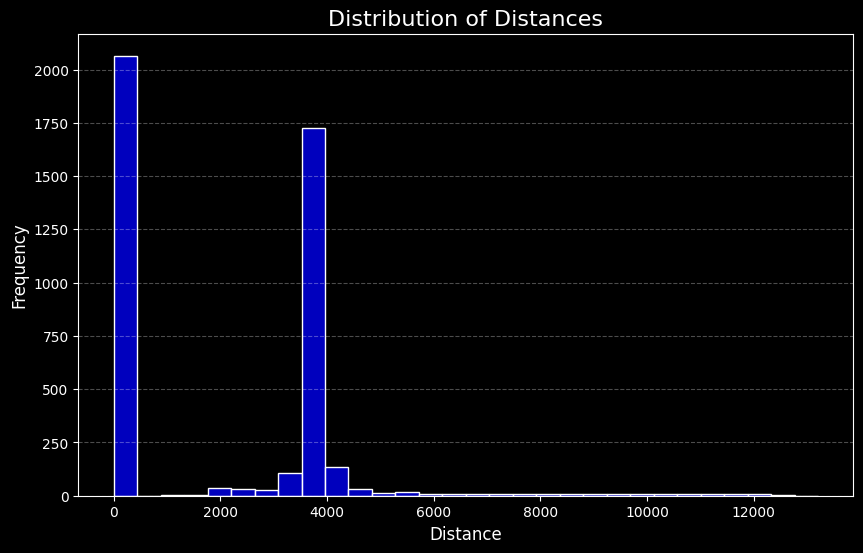

In [22]:
median_dist = np.median(df['distance'])
mean_dist = np.mean(df['distance'])

plt.style.use('dark_background')
plt.figure(figsize=(10,6))

sns.histplot(df['distance'], color="blue", edgecolor='white')

plt.title('Distribution of Distances', fontsize=16, color='white')
plt.xlabel('Distance', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

The histogram shows a high peak at 0, meaning there are a lot of zero values in the data. After that, most of the distances seem to be concentrated around 4000. We didn’t remove the zero values because they might represent instances where the net was stationary or no distance was recorded during the survey. However, to get a clearer picture, we will create another visualisation excluding the zero values.

**Distance Distribution - excluding 0 values**

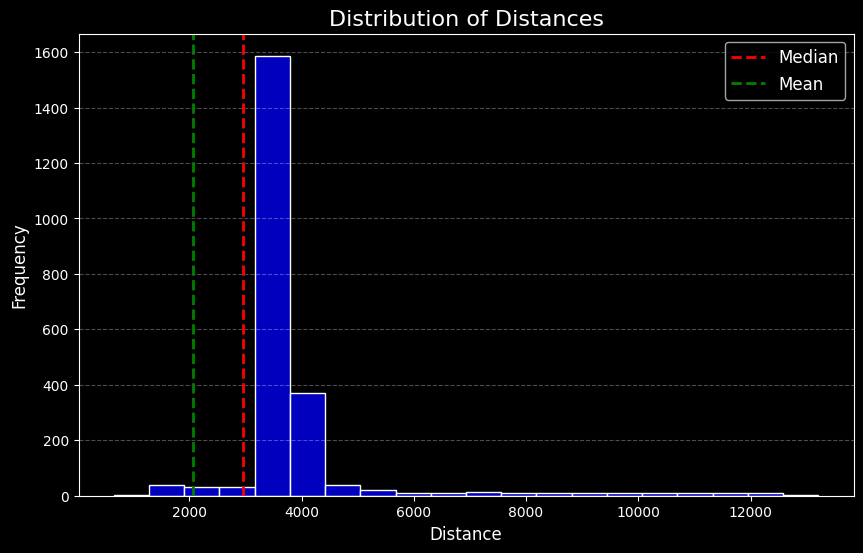

In [23]:
plt.style.use("dark_background")
plt.figure(figsize=(10,6))

# filter dataset for non-zero values
non_zero_distances = df[df['distance']>0]['distance']
sns.histplot(non_zero_distances, bins=20, color="blue", edgecolor='white')

# titles and labels
plt.title('Distribution of Distances', fontsize=16, color='white')
plt.xlabel('Distance', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)

# annotations
plt.axvline(median_dist, color='red', linestyle='--', linewidth=2, label='Median')
plt.axvline(mean_dist, color='green', linestyle='--', linewidth=2, label = 'Mean')

plt.legend(loc='upper right', fontsize=12)

plt.show()

The non-zero distance histogram shows most values concentrated around the 3000-400 range. The data is skewed to the right, with extreme outliers around 8000-12000.

**Logarithmic Scaling on Frequency Axis**

In order to compare smaller frequencies, the log y scale was used because it compresses the large differences in frequency. This makes it easier to see and compare smaller values that might otherwise be hidden by much larger ones.

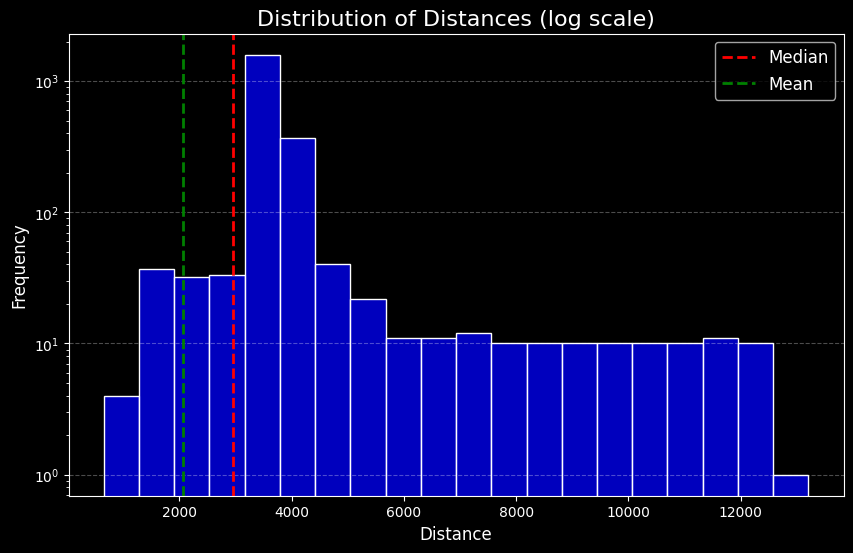

In [24]:
plt.style.use("dark_background")
plt.figure(figsize=(10,6))

# filter dataset for non-zero values
non_zero_distances = df[df['distance']>0]['distance']
sns.histplot(non_zero_distances, bins=20, color="blue", edgecolor='white')

# titles and labels
plt.title('Distribution of Distances (log scale)', fontsize=16, color='white')
plt.xlabel('Distance', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)

# apply log scale
plt.yscale('log')

# annotations
plt.axvline(median_dist, color='red', linestyle='--', linewidth=2, label='Median')
plt.axvline(mean_dist, color='green', linestyle='--', linewidth=2, label = 'Mean')

plt.legend(loc='upper right', fontsize=12)

plt.show()

The log scale helps visualise the variation, showing that shorter trawls (3000-4000km) are more common, but longer ones (8000-12000) still occur occasionally.

---

`TOTAL LITTER`

**Total Litter Count Distribution**

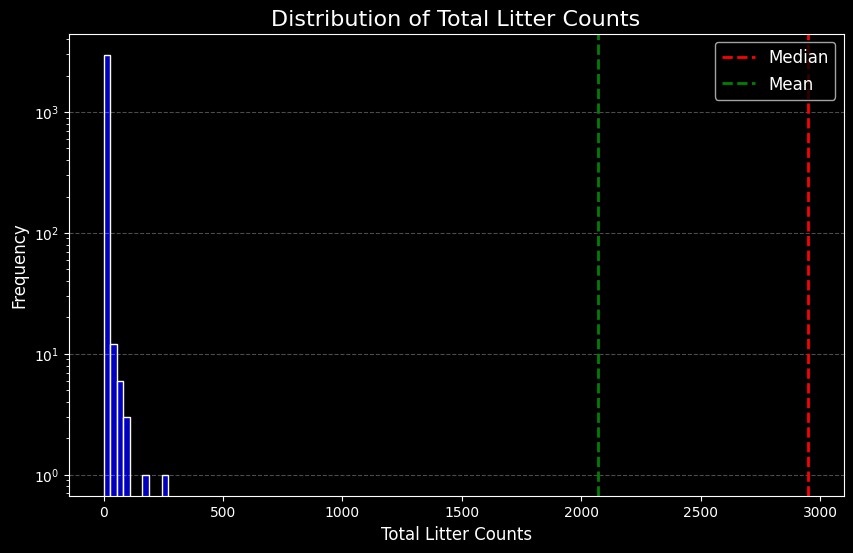

In [25]:
plt.style.use("dark_background")
plt.figure(figsize=(10,6))

# filter dataset for non-zero values
non_zero_litter = df[df['totallitter']>0]['totallitter']
sns.histplot(non_zero_litter, bins=10, color="blue", edgecolor='white')

# titles and labels
plt.title('Distribution of Total Litter Counts', fontsize=16, color='white')
plt.xlabel('Total Litter Counts', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)

# annotations
plt.axvline(median_dist, color='red', linestyle='--', linewidth=2, label='Median')
plt.axvline(mean_dist, color='green', linestyle='--', linewidth=2, label = 'Mean')
plt.yscale('log')
plt.legend(loc='upper right', fontsize=12)
plt.show()

This graph shows an incredibly wide distribution of litter counts. It is evident that the majority of data is clustered towards the lower count range (close to 0), therefore to see more detail, a limited range of the graph concentrating on these areas will need to be inspected

**Total Litter Count Distribution - 0 to 10 range**

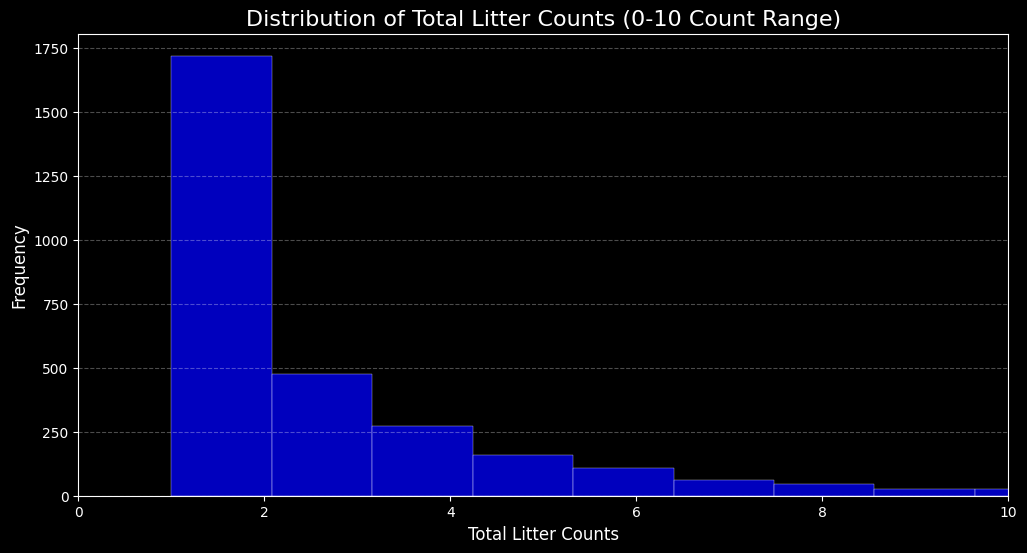

In [26]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6))

sns.histplot(non_zero_litter, bins=250, color="blue", edgecolor='white')

# titles and labels
plt.title('Distribution of Total Litter Counts (0-10 Count Range)', fontsize=16, color='white')
plt.xlabel('Total Litter Counts', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# focus on 0-10 range
plt.xlim(0,10) 

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

As shown in the above graph, the  majority of litter counts are between the 1-4 count range. Therefore, this range will be further examined in greater detail.

**Total Litter Count Distribution - 0 to 4 range**

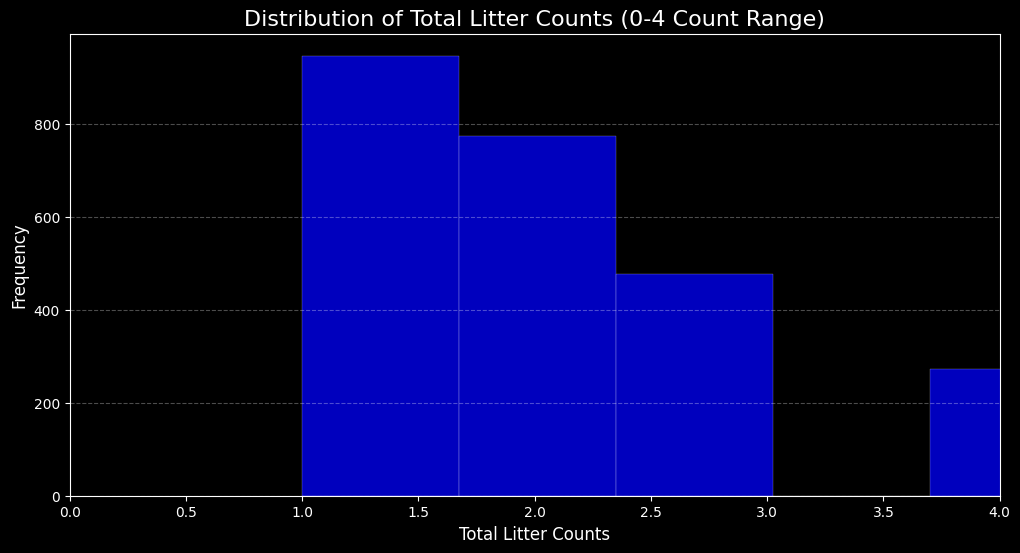

In [27]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6))

sns.histplot(non_zero_litter, bins=400, color="blue", edgecolor='white')

# titles and labels
plt.title('Distribution of Total Litter Counts (0-4 Count Range)', fontsize=16, color='white')
plt.xlabel('Total Litter Counts', fontsize=12, color='white') # Label x axis
plt.ylabel('Frequency', fontsize=12, color='white')

# focus on 0-4 range
plt.xlim(0,4) 

# soft grid for slightly easier reading
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

With 400 bins, the data reveals a heavy concentration of litter counts per item between 1.0 and 2.0, which suggests that very low counts per item are the most common.

#### 2.2.2 Boxplots

As part of the initial data exploration in Notebook 1, box plots were created for the 'distance' and 'total litter' variables. These plots helped identify and visualise the spread of the data, as well as any values that deviated significantly from the typical range, indicating potential outliers.

#### 2.2.3 Density Plots

Density plots provide a visual representation of the distribution of a dataset. They are similar to histograms, but they provide a smoother representation of the data. The density plot below shows the distribution of the 'distance' column in the dataset. Furthermore, the inclusion of a Kernel Density Estimation (KDE) line allows for a smoothed estimation of the underlying probability distribution.


`DISTANCE`

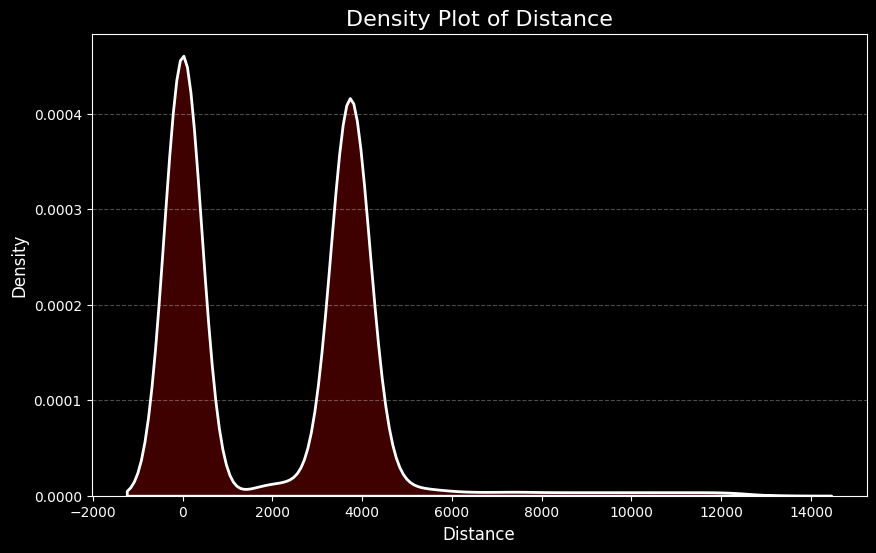

In [38]:
plt.style.use("dark_background")  # Set the dark background

# Density plot for distance
plt.figure(figsize=(10, 6))  
sns.kdeplot(df['distance'], color='red', fill=True, linewidth=2, edgecolor='white')
plt.title('Density Plot of Distance', fontsize=16, color='white')
plt.xlabel('Distance', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

The density plot of survey distances shows two peaks, one near 0 and another around 4000. Unlike a histogram, which uses bars and can be affected by bin size, the density plot provides a smooth curve that makes it easier to spot patterns. Here, it shows two groups: one close to the starting point (0) and another further away at 4000. This gives a clearer view of the data's shape.

**KDE: Zoom into 2000-6000**

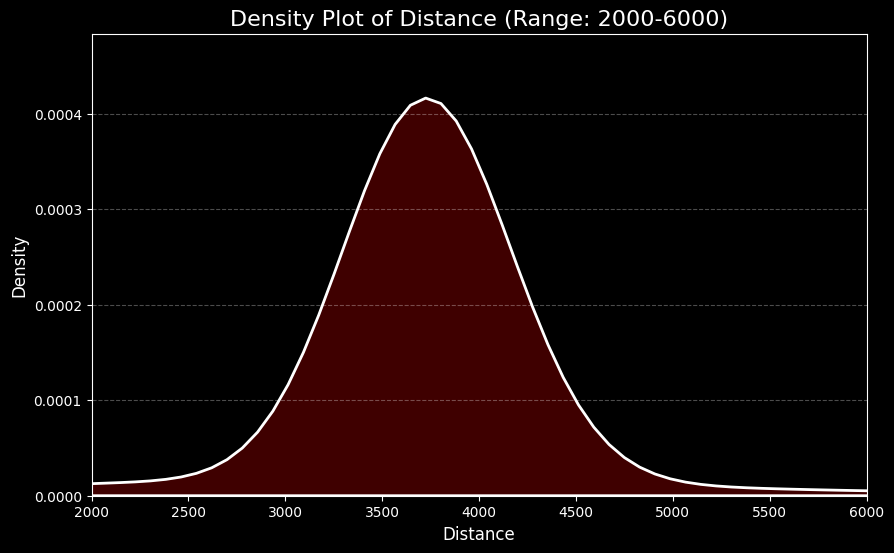

In [41]:
plt.style.use("dark_background")  # Set the dark background

# Density plot for distance
plt.figure(figsize=(10, 6))
sns.kdeplot(df['distance'], color='red', fill=True, linewidth=2, edgecolor='white')

# Zoom in on the x-axis
plt.xlim(2000, 6000)  # Set the x-axis limits

plt.title('Density Plot of Distance (Range: 2000-6000)', fontsize=16, color='white')
plt.xlabel('Distance', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

The zoomed-in KDE plot between 2000 and 6000 shows a peak between 3500 and 4000, with the highest point closer to 4000. This suggests that most of the survey distances in this range are concentrated around 4000, with fewer observations as you move away from that value. The smooth curve makes it clear that there is a strong concentration of data near 4000.

`TOTAL LITTER`

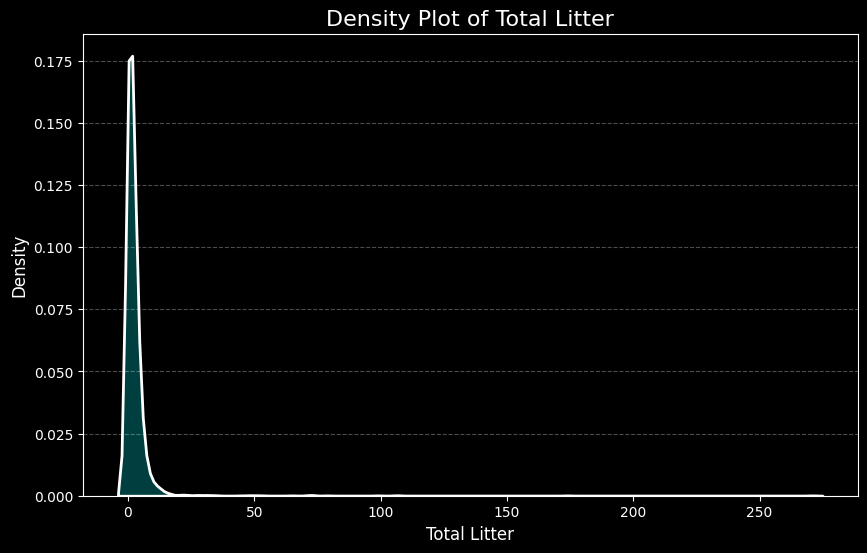

In [42]:
# Density plot for total litter
plt.figure(figsize=(10, 6))
sns.kdeplot(df['totallitter'], color='cyan', fill=True, linewidth=2, edgecolor='white')
plt.title('Density Plot of Total Litter', fontsize=16, color='white')
plt.xlabel('Total Litter', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

The total litter data, similar to the histogram analysis, benefits from zooming into specific ranges. For example, focusing on the 0-10 range provides a clearer view of the data's distribution in this area.

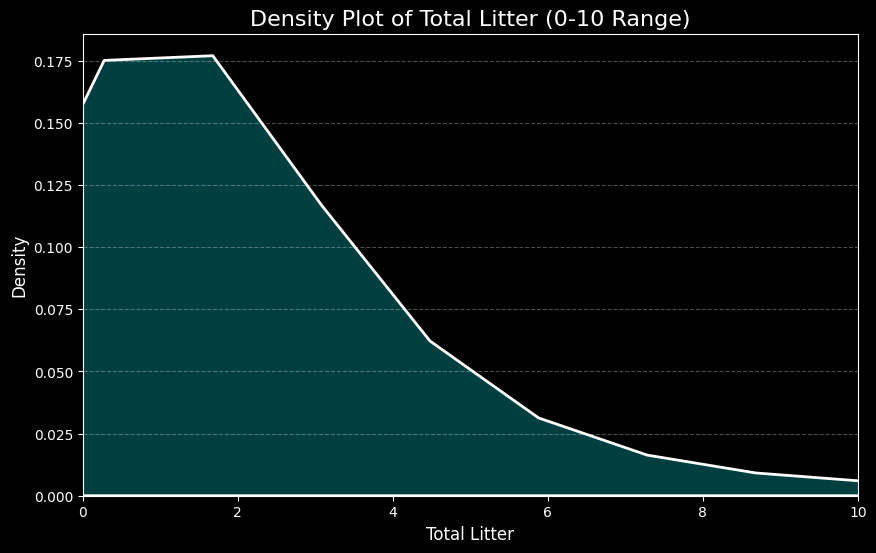

In [43]:
plt.style.use("dark_background")  # Set the dark background# Density plot for total litter

plt.figure(figsize=(10, 6))
sns.kdeplot(df['totallitter'], color='cyan', fill=True, linewidth=2, edgecolor='white') # Zoom in on the x-axis
plt.xlim(0, 10)  # Set the x-axis limits

plt.title('Density Plot of Total Litter (0-10 Range)', fontsize=16, color='white')
plt.xlabel('Total Litter', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

As previously found, the KDE plot shows a peak between 0 and 2, which then tails off. This indicates that most of the data points are concentrated in this range, with fewer observations as the distance increases beyond 2.

### 2.3 Analysis of Categorical Values

**2.3.1 Bar charts & Pie Charts**

`Area`

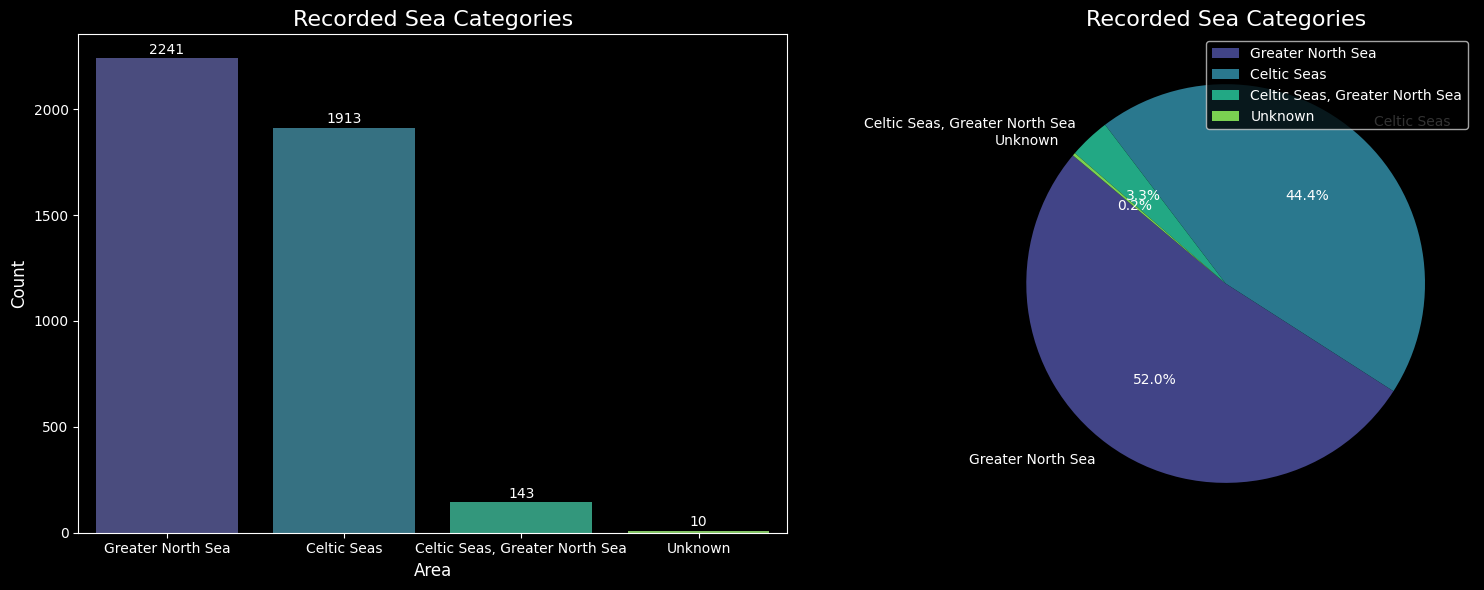

In [66]:
# Area counts
area_counts = df['area'].value_counts()

# Create figure with 2 plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar plot of areas
sns.barplot(x=area_counts.index, y=area_counts.values, ax=ax1, hue=area_counts.index, palette='viridis')
ax1.set_title('Recorded Sea Categories', fontsize=16)
ax1.set_xlabel('Area', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# annotate the bars
for i, v in enumerate(area_counts):
    ax1.text(i, v + 20, str(v), color='white', ha='center')

# Plot 2: Pie chart of areas
ax2.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(area_counts)))
ax2.set_title('Recorded Sea Categories', fontsize=16)
ax2.legend(area_counts.index, loc='upper right')


# autopct = format the percentage into 1 decimal place
# startangle = rotate the pie chart by 140 degrees

plt.tight_layout()  
plt.show()

A bar chart and a pie chart were used to compare different visualisation types. The bar chart revealed that the Greater North had the highest count, followed by the Celtic region, both, and finally the unknown category. The "unknown" slice in the pie chart was too small to be easily visible, which is why the bar chart was preferred for a clearer comparison.

`Survey`

/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_71448/2445902616.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


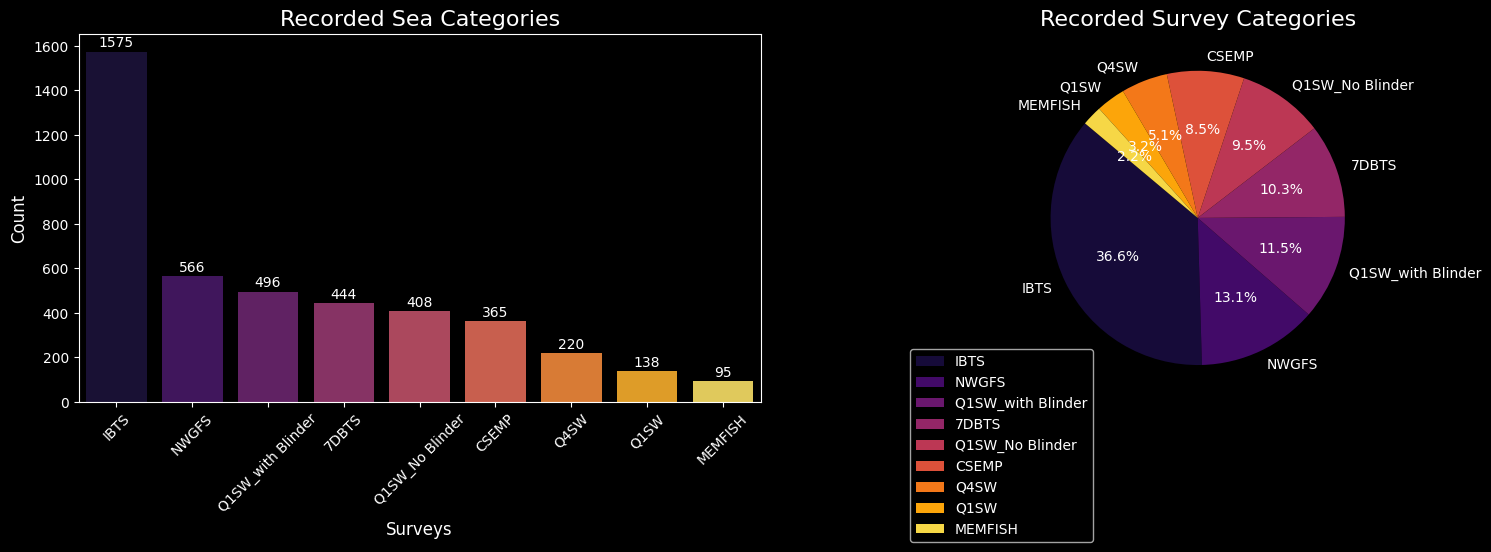

In [86]:
# Area counts
survey_counts = df['survey'].value_counts()

# Create figure with 2 plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar plot of areas
sns.barplot(x=survey_counts.index, y=survey_counts.values, ax=ax1, hue=survey_counts.index, palette='inferno')
ax1.set_title('Recorded Sea Categories', fontsize=16)
ax1.set_xlabel('Surveys', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# annotate the bars
for i, v in enumerate(survey_counts):
    ax1.text(i, v + 20, str(v), color='white', ha='center')

# Plot 2: Pie chart of areas
ax2.pie(survey_counts, labels=survey_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('inferno', len(survey_counts)))
ax2.set_title('Recorded Survey Categories', fontsize=16)
ax2.legend(survey_counts.index, loc='lower left', bbox_to_anchor=(-0.3, -0.4))


# autopct = format the percentage into 1 decimal place
# startangle = rotate the pie chart by 140 degrees

plt.tight_layout()  
plt.show()

The highest counts were observed in the IBTS survey, while the lowest counts were found in the MEMFISH survey. The surveys 'CSEMP', '7DBTS', 'NWGFS', 'Q1SW_with Blinder', and 'Q1SW_No Blinder' all showed similar proportions within the dataset, indicating a comparable distribution across these surveys.

### 2.4 Visualisation Insights & Evaluation

# Section 3 : Multivariate Analysis

### 3.1 Intro to Multivariate Analysis

### 3.2 Categorical vs. Categorical

### 3.3 Categorical vs. Numerical

### 3.4 Numerical vs. Numerical

### 3.5 Visualisation Insights & Evaluation

# Section 4 : Insights and Interpretations

### 4.1 Summary of Key Findings

### 4.2 Discussion of Implications